<a href="https://colab.research.google.com/github/prabhaM07/Large_Language_Model/blob/main/NLP_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
class MedicalAttentionModel:
    def __init__(self, model_name="emilyalsentzer/Bio_ClinicalBERT"):
        """
        Initializes the ClinicalBERT model for medical text processing.
        """
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name, output_attentions=True)

    def get_attention(self, text):
        """
        Tokenizes the input text and extracts attention weights.
        Returns:
            tokens (list): Tokenized words
            attentions (tensor): Attention scores from the last layer
        """
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True)
        with torch.no_grad():
            outputs = self.model(**inputs)

        return inputs.tokens(), outputs.attentions[-1]  # Last layer attention


In [ ]:
def plot_attention_heatmap(tokens, attention):
    """
    Generates an attention heatmap for given tokens & attention scores.
    Args:
        tokens (list): Tokenized words
        attention (tensor): Attention scores from Transformer model
    """
    attention = attention.mean(dim=0).squeeze().cpu().numpy()  # Mean over heads
    attention = attention[:len(tokens), :len(tokens)]  # Trim to valid token range

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=True)
    plt.title("Attention Heatmap for Medical Symptoms")
    plt.xlabel("Tokens")
    plt.ylabel("Attention Weight")
    plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.



Analyzing: Patient reports persistent cough, high fever, and difficulty breathing for the past three days.



model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

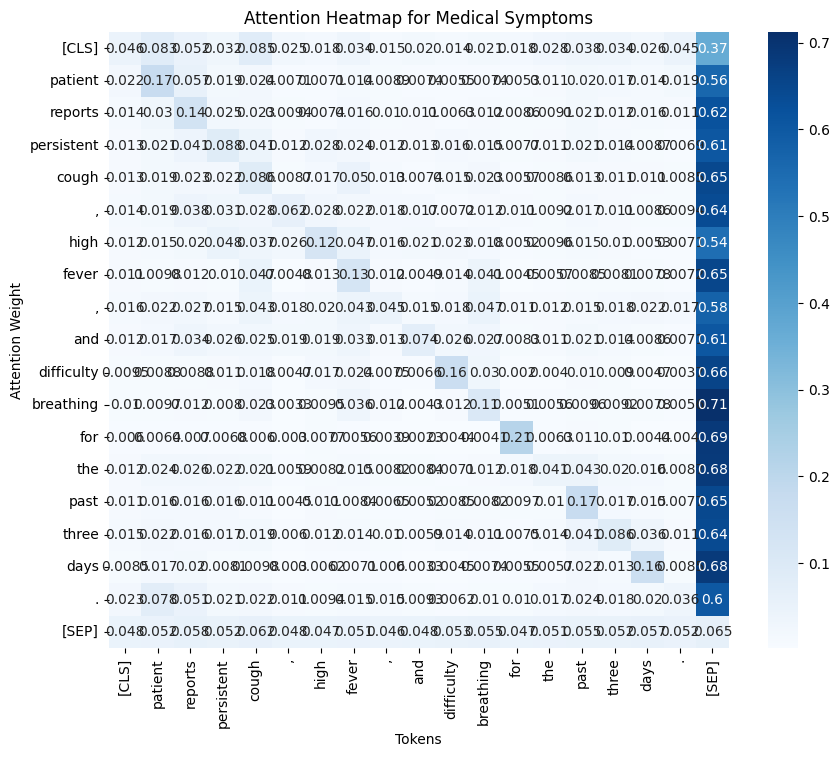


Analyzing: Mild headache and occasional dizziness, but no fever or cough.



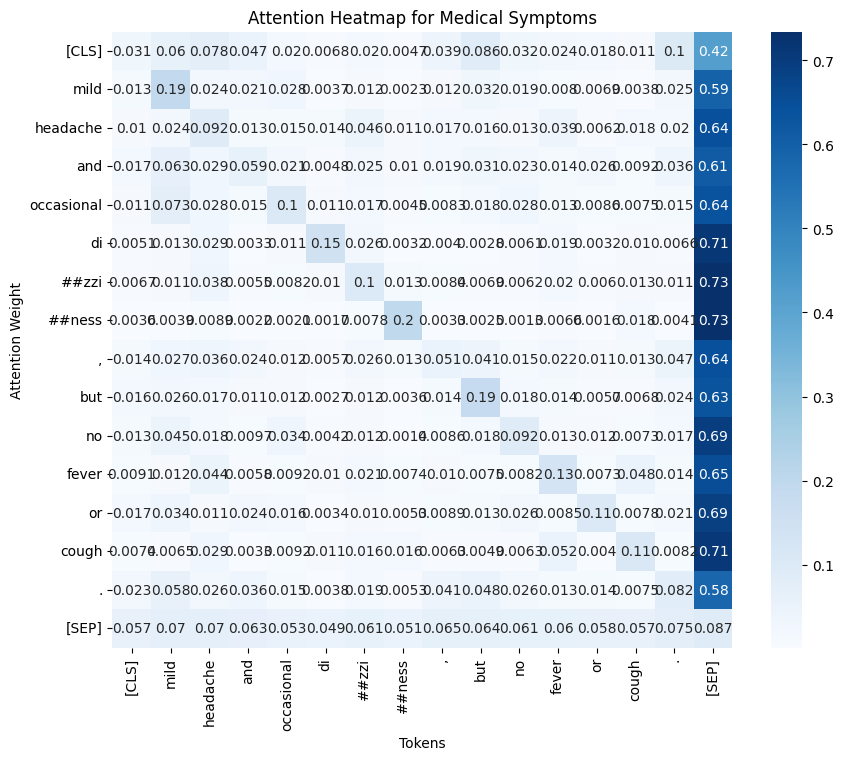


Analyzing: Sudden vision loss and severe chest pain experienced since this morning.



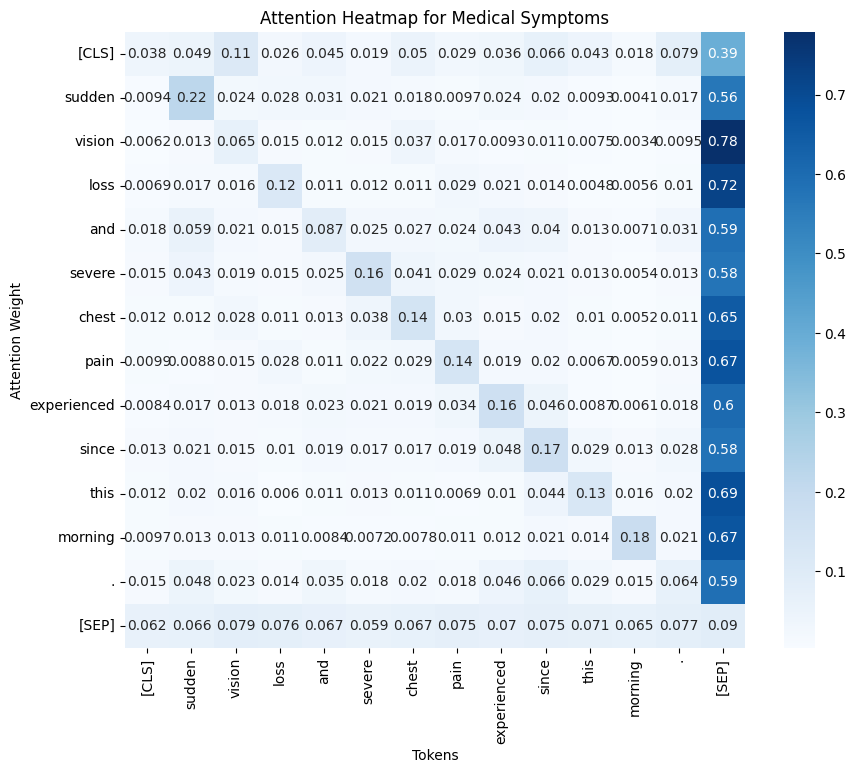

In [ ]:
# Initialize model
model = MedicalAttentionModel()

# Define case studies
medical_cases = [
    "Patient reports persistent cough, high fever, and difficulty breathing for the past three days.",
    "Mild headache and occasional dizziness, but no fever or cough.",
    "Sudden vision loss and severe chest pain experienced since this morning."
]

# Analyze attention for each case
for case in medical_cases:
    print(f"\nAnalyzing: {case}\n")
    tokens, attention = model.get_attention(case)
    plot_attention_heatmap(tokens, attention[0])  # Extract attention for first head


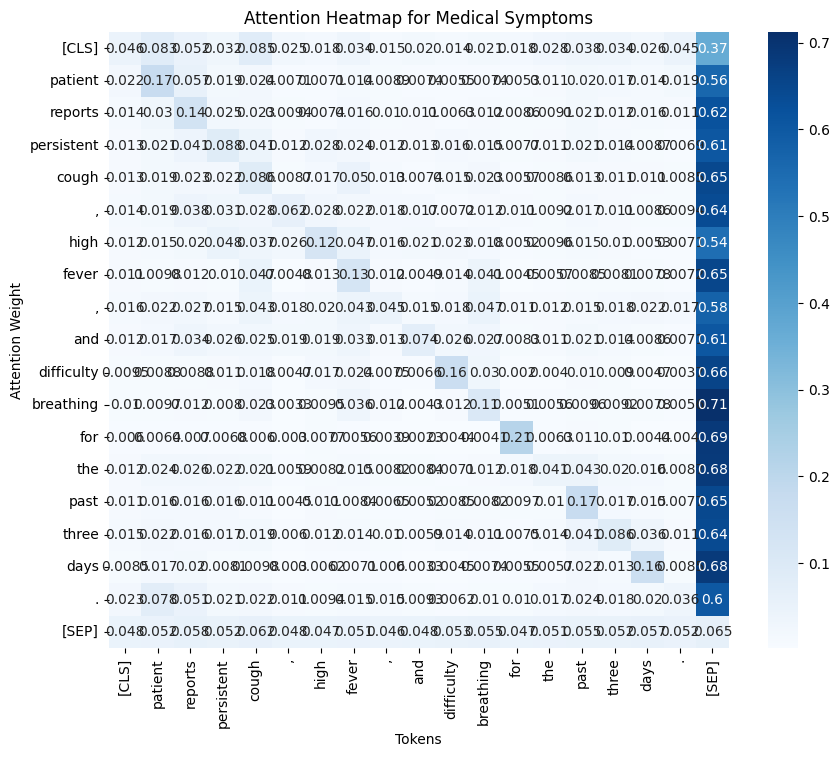

In [ ]:
text = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
tokens, attention = model.get_attention(text)
plot_attention_heatmap(tokens, attention[0])


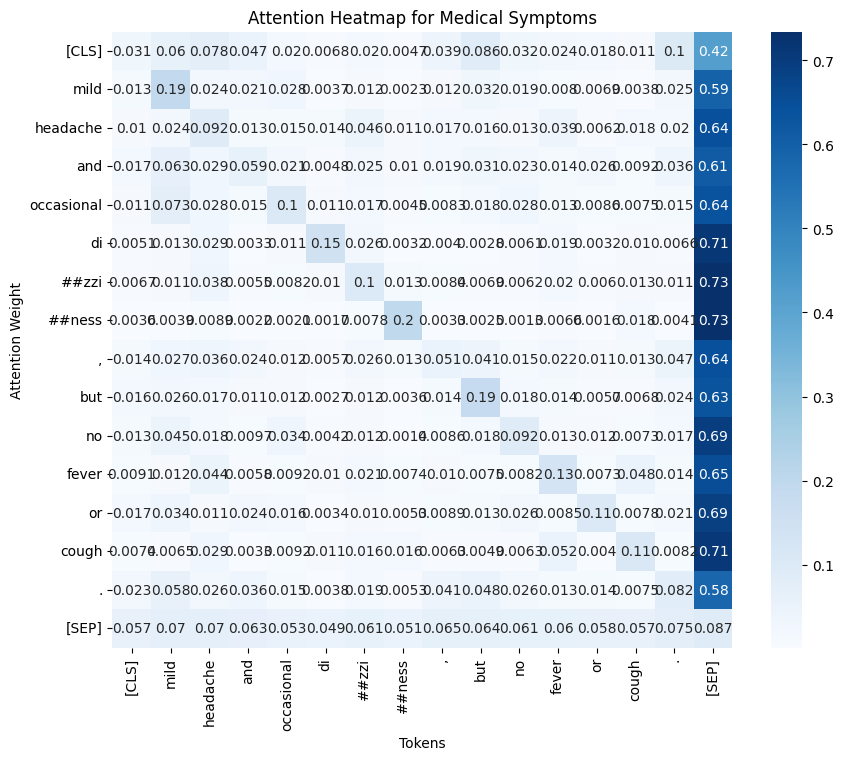

In [ ]:
text = "Mild headache and occasional dizziness, but no fever or cough."
tokens, attention = model.get_attention(text)
plot_attention_heatmap(tokens, attention[0])


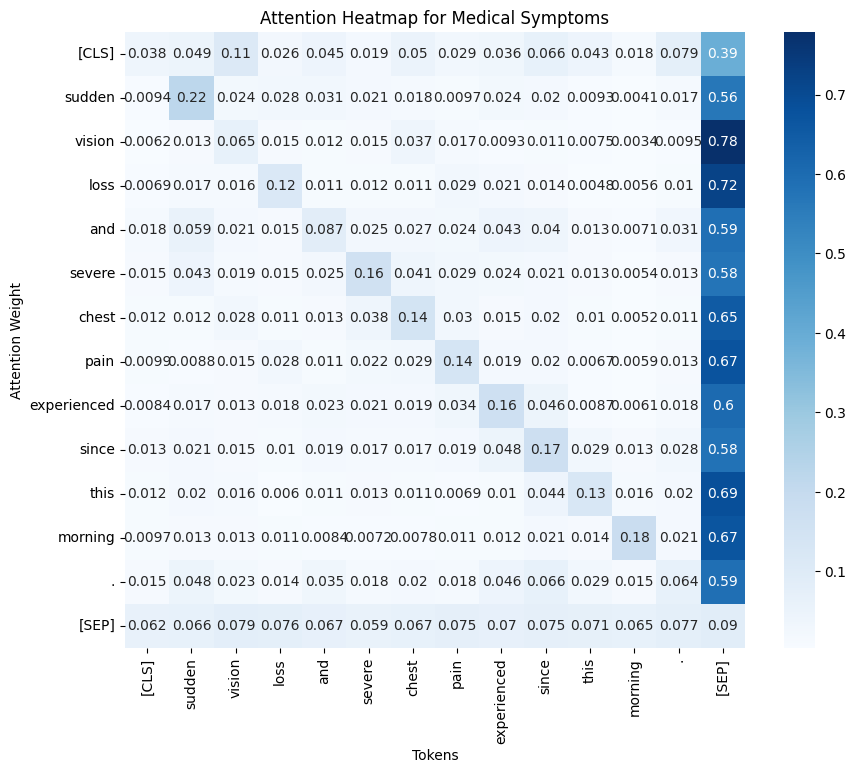

In [ ]:
text = "Sudden vision loss and severe chest pain experienced since this morning."
tokens, attention = model.get_attention(text)
plot_attention_heatmap(tokens, attention[0])
